In [97]:
import numpy as np
import matplotlib.pyplot as plt
    

In [98]:
class RidgeRegressor(object):
    """
    Linear Least Squares Regression with Tikhonov regularization.
    More simply called Ridge Regression.
    We wish to fit our model so both the least squares residuals and L2 norm
    of the parameters are minimized.
    argmin Theta ||X*Theta - y||^2 + alpha * ||Theta||^2
    A closed form solution is available.
    Theta = (X'X + G'G)^-1 X'y
    Where X contains the independent variables, y the dependent variable and G
    is matrix alpha * I, where alpha is called the regularization parameter.
    When alpha=0 the regression is equivalent to ordinary least squares.
    http://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)
    http://en.wikipedia.org/wiki/Tikhonov_regularization
    http://en.wikipedia.org/wiki/Ordinary_least_squares
    """

    def fit(self, X, y, alpha=0):
        """
        Fits our model to our training data.
        Arguments
        ----------
        X: mxn matrix of m examples with n independent variables
        y: dependent variable vector for m examples
        alpha: regularization parameter. A value of 0 will model using the
        ordinary least squares regression.
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        G = alpha * np.eye(X.shape[1])
        G[0, 0] = 0  # Don't regularize bias
        print("G:\n", G)
        print("G.T:\n", G.T)
        print("np.dot(G.T, G):\n", np.dot(G.T, G))
        print("-"*30)
        self.params = np.dot(np.linalg.inv(np.dot(X.T, X) + np.dot(G.T, G)),
                             np.dot(X.T, y))

    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.
        The assumption here is that the new data is iid to the training data.
        Arguments
        ----------
        X: mxn matrix of m examples with n independent variables
        alpha: regularization parameter. Default of 0.
        Returns
        ----------
        Dependent variable vector for m examples
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.params)

In [99]:
# Create synthetic data
X = np.linspace(0, 6, 100)
y = 1 + 2 * np.sin(X)
yhat = y + .5 * np.random.normal(size=len(X))

In [100]:
X.shape

(100,)

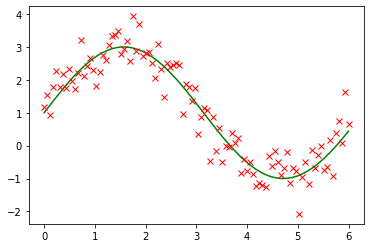

In [101]:
# Plot synthetic data
plt.plot(X, y, 'g', label='y = 1 + 2 * sin(x)')
plt.plot(X, yhat, 'rx', label='noisy samples')

In [102]:
# Plot regressors
alpha = 3.0
r = RidgeRegressor()
tX = np.array([X]).T
len(tX)

100

In [103]:
tX = np.hstack((tX, np.power(tX, 2), np.power(tX, 3)))

In [104]:
len(tX)

100

In [105]:
tX[:20]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.06060606e-02, 3.67309458e-03, 2.22611793e-04],
       [1.21212121e-01, 1.46923783e-02, 1.78089434e-03],
       [1.81818182e-01, 3.30578512e-02, 6.01051841e-03],
       [2.42424242e-01, 5.87695133e-02, 1.42471547e-02],
       [3.03030303e-01, 9.18273646e-02, 2.78264741e-02],
       [3.63636364e-01, 1.32231405e-01, 4.80841473e-02],
       [4.24242424e-01, 1.79981635e-01, 7.63558450e-02],
       [4.84848485e-01, 2.35078053e-01, 1.13977238e-01],
       [5.45454545e-01, 2.97520661e-01, 1.62283997e-01],
       [6.06060606e-01, 3.67309458e-01, 2.22611793e-01],
       [6.66666667e-01, 4.44444444e-01, 2.96296296e-01],
       [7.27272727e-01, 5.28925620e-01, 3.84673178e-01],
       [7.87878788e-01, 6.20752984e-01, 4.89078109e-01],
       [8.48484848e-01, 7.19926538e-01, 6.10846760e-01],
       [9.09090909e-01, 8.26446281e-01, 7.51314801e-01],
       [9.69696970e-01, 9.40312213e-01, 9.11817904e-01],
       [1.03030303e+00, 1.06152

In [106]:
tX.shape

(100, 3)

In [107]:
tX.shape

(100, 3)

In [108]:
y

array([ 1.        ,  1.12113793,  1.24183105,  1.36163617,  1.48011337,
        1.59682761,  1.71135032,  1.82326097,  1.93214862,  2.03761346,
        2.13926821,  2.23673961,  2.32966973,  2.41771734,  2.50055914,
        2.57789093,  2.64942875,  2.71490991,  2.77409398,  2.82676363,
        2.87272545,  2.91181068,  2.9438758 ,  2.96880307,  2.98650095,
        2.99690445,  2.99997539,  2.99570247,  2.98410139,  2.96521475,
        2.9391119 ,  2.90588869,  2.86566711,  2.81859485,  2.76484477,
        2.70461424,  2.63812441,  2.56561943,  2.48736555,  2.4036501 ,
        2.31478049,  2.22108305,  2.12290183,  2.02059734,  1.91454525,
        1.80513498,  1.69276828,  1.57785775,  1.46082534,  1.3421008 ,
        1.22212008,  1.10132373,  0.98015533,  0.8590598 ,  0.73848179,
        0.61886407,  0.50064588,  0.38426129,  0.27013768,  0.15869411,
        0.05033978, -0.05452742, -0.15552243, -0.2522744 , -0.34442805,
       -0.431645  , -0.51360499, -0.59000707, -0.66057069, -0.72

In [109]:
y.shape

(100,)

G:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
G.T:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
np.dot(G.T, G):
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
------------------------------
G:
 [[0. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
G.T:
 [[0. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
np.dot(G.T, G):
 [[0. 0. 0. 0.]
 [0. 9. 0. 0.]
 [0. 0. 9. 0.]
 [0. 0. 0. 9.]]
------------------------------


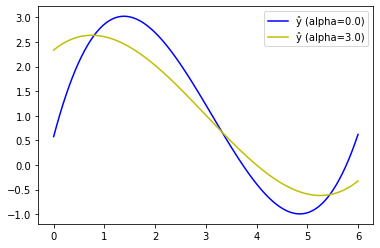

In [110]:
r.fit(tX, y)
plt.plot(np.ravel(X), np.ravel(r.predict(tX)), 'b', label=u'ŷ (alpha=0.0)')
r.fit(tX, y, alpha)
plt.plot(np.ravel(X), np.ravel(r.predict(tX)), 'y', label=u'ŷ (alpha=%.1f)' % alpha)
plt.legend()

plt.show()

In [111]:
len(np.ravel(X))

100

In [112]:
len(np.ravel(r.predict(tX)))

100

# With real data

In [113]:
import pandas as pd
# load dataset
dataset = pd.read_csv('https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv')

# defenition X and y
X = dataset.iloc[:,[2,7,8]]
y = dataset.iloc[:, 60]

In [114]:
X.shape

(39644, 3)

In [115]:
y.shape

(39644,)

In [116]:
alpha = 3.0
r = RidgeRegressor()

In [117]:
len(np.ravel(X))

118932

In [118]:
# len(np.ravel(r.predict(tX)))

G:
 [[0. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
G.T:
 [[0. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
np.dot(G.T, G):
 [[0. 0. 0. 0.]
 [0. 9. 0. 0.]
 [0. 0. 9. 0.]
 [0. 0. 0. 9.]]
------------------------------


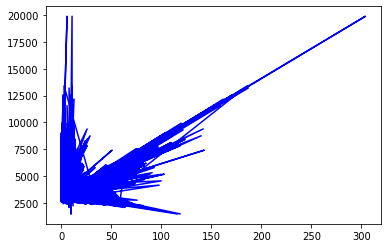

In [119]:
r.fit(X, y, alpha)
plt.plot(X, np.ravel(r.predict(X)), 'b', label=u'ŷ (alpha=0.0)')

In [120]:
len(r.predict(X))

39644

In [121]:
len(X)

39644

In [122]:
r.predict(X)[:10]

array([3196.84526173, 3023.45834663, 3023.45834663, 3436.03242002,
       2897.26682408, 2957.80600926, 2626.15147631, 2819.97734402,
       3163.41692548, 3142.97797287])

In [123]:
y[:10]

0     593
1     711
2    1500
3    1200
4     505
5     855
6     556
7     891
8    3600
9     710
Name:  shares, dtype: int64

In [124]:
m, b = np.polyfit(r.predict(X), y, 1)

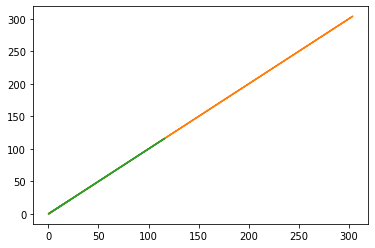

In [125]:
plt.plot(X, m*X + b)

Second manual ridge class

In [126]:
# determine Ridge class manually
class RidgeRegression() : 
	
	def __init__(self, learning_rate, iterations, l2_penality) : 
		
		self.learning_rate = learning_rate		 
		self.iterations = iterations		 
		self.l2_penality = l2_penality 
		
	# Function for model training			 
	def fit(self, X, Y) : 
		
		# no_of_training_examples, no_of_features		 
		self.m, self.n = X.shape 
		
		# weight initialization		 
		self.W = np.zeros(self.n) 
		
		self.b = 0		
		self.X = X		 
		self.Y = Y 
		
		# gradient descent learning 
				
		for i in range(self.iterations) :			 
			self.update_weights()			 
		return self
	
	# Helper function to update weights in gradient descent 
	
	def update_weights(self) :		 
		Y_pred = self.predict(self.X) 
		
		# calculate gradients	 
		dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +			
			( 2 * self.l2_penality * self.W ) ) / self.m	 
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
		
		# update weights	 
		self.W = self.W - self.learning_rate * dW	 
		self.b = self.b - self.learning_rate * db		 
		return self
	
	# Hypothetical function h( x ) 
	def predict(self, X) :	 
		return X.dot(self.W) + self.b 

In [127]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
# Model training     
model = RidgeRegression( iterations = 1000,                              
                        learning_rate = 0.01, l2_penality = 1 ) 
model.fit( X_train, y_train ) 
  
# Prediction on test set 
y_pred = model.predict( X_test )     
print( "Predicted values ", np.round( y_pred[:3], 2 ) )      
print( "Real values      ", y_test[:3] )     
print( "Trained W        ", round( model.W[0], 2 ) )     
print( "Trained b        ", round( model.b, 2 ) ) 

Predicted values  18765   NaN
16349   NaN
27703   NaN
dtype: float64
Real values       18765      919
16349     1600
27703    11700
Name:  shares, dtype: int64
Trained W         nan
Trained b         -inf


In [128]:
import numpy as np
import scipy.io as sio

data_Mat = sio.loadmat('dataset2.mat')


def phi(x, n):
    return np.array([x ** i for i in range(0, n + 1)])


def split_dataset(x, y, split):
    split_x = np.vsplit(x, split)
    split_y = np.vsplit(y, split)
    return split_x, split_y


def gradient_descent(x, y, learning_rate, lam, iters, epsilon):
    theta = np.zeros((x.shape[1], 1))

    x_trans = np.transpose(x)
    for i in range(0, iters):
        x_theta = np.matmul(x, theta)
        xTminusy = np.subtract(x_theta, y)
        partial_deri = np.matmul(x_trans, xTminusy) * 2
        lamb_theta = lam * theta * 2
        partial_deri2 = np.add(partial_deri, lamb_theta)
        partial_deri2 = partial_deri2 * learning_rate
        new_theta = theta - partial_deri2
        diff = new_theta - theta
        if np.linalg.norm(diff, 2) <= epsilon:
            theta = new_theta
            break
        theta = new_theta
    return theta


def calculate_loss(theta, lam, x_holdout, y_holdout):
    x_theta = np.matmul(x_holdout, theta)
    term1 = y_holdout - x_theta
    theta_norm = np.linalg.norm(theta, 2) ** 2
    lam_theta = lam * theta_norm
    temp = np.linalg.norm(term1, 2) ** 2
    return lam_theta + temp


lambda_exp = [0.1, 0.001, 0.0001, 1, 2, 0.00001, 0.000001, 3, 0.01, 0.00000000000001]


def ridge_regress(x_t, y_t):
    master_holdout_error = []
    for j in lambda_exp:
        master_loss = []
        for i in range(len(x_t)):
            x_train_copy = x_t.copy()
            del x_train_copy[i]
            y_copy = y_t.copy()
            del y_copy[i]
            x_train_copy = np.concatenate(x_train_copy)
            y_copy = np.concatenate(y_copy)
            master_loss.append(
                calculate_loss(gradient_descent(x_train_copy, y_copy, 0.00000001, j, 60, 0.001), j, x_t[i], y_t[i]))
        avg = np.average(np.array(master_loss))
        master_holdout_error.append(avg)
    final_lambda = np.argmin(np.array(master_holdout_error))
    return final_lambda


x_train, x_test, y_train, y_test = data_Mat['X_trn'], data_Mat['X_tst'], data_Mat['Y_trn'], data_Mat['Y_tst']
# print(data_Mat)
x_train2 = np.array([phi(x_train[i][0], 2) for i in range(0, len(x_train))])
# print(x_test.shape)
# exit(0)
x_test2 = np.array([phi(x_test[i][0], 2) for i in range(0, len(x_test))])
x_train5 = np.array([phi(x_train[i][0], 5) for i in range(0, len(x_train))])
x_test5 = np.array([phi(x_test[i][0], 5) for i in range(0, len(x_test))])

splitted2_2 = split_dataset(x_train2, y_train, 2)
x_train2_2 = splitted2_2[0]
y_train_2 = splitted2_2[1]

splitted2_N = split_dataset(x_train2, y_train, len(x_train2))
x_train2_N = splitted2_N[0]
y_train_N = splitted2_N[1]

splitted5_2 = split_dataset(x_train5, y_train, 2)
x_train5_2 = splitted5_2[0]
y_train_2 = splitted5_2[1]

splitted5_N = split_dataset(x_train5, y_train, len(x_train5))
x_train5_N = splitted5_N[0]
y_train_N = splitted5_N[1]

lam2_2 = ridge_regress(x_train2_2, y_train_2)

lam2_N = ridge_regress(x_train2_N, y_train_N)

lam5_2 = ridge_regress(x_train5_2, y_train_2)

lam5_N = ridge_regress(x_train5_N, y_train_N)

theta2_2 = gradient_descent(np.concatenate(x_train2_2), np.concatenate(y_train_2), 0.00000001, lambda_exp[lam2_2], 60,
                            0.0010)

theta2_N = gradient_descent(np.concatenate(x_train2_N), np.concatenate(y_train_N), 0.00000001, lambda_exp[lam2_N], 60,
                            0.0010)

theta5_2 = gradient_descent(np.concatenate(x_train5_2), np.concatenate(y_train_2), 0.00000000001, lambda_exp[lam5_2], 70,
                            0.0001)

theta5_N = gradient_descent(np.concatenate(x_train5_N), np.concatenate(y_train_N), 0.00000000001, lambda_exp[lam5_N], 70,
                            0.0001)

print(calculate_loss(theta2_2, lambda_exp[lam2_2], x_test2, y_test))
print(calculate_loss(theta2_2, lambda_exp[lam2_2], np.concatenate(x_train2_2), np.concatenate(y_train_2)))
print(lambda_exp[lam2_2])
print(theta2_2)

print("-------------------------------------")

print(calculate_loss(theta2_N, lambda_exp[lam2_N], x_test2, y_test))
print(calculate_loss(theta2_N, lambda_exp[lam2_N], np.concatenate(x_train2_N), np.concatenate(y_train_N)))
print(lambda_exp[lam2_N])
print(theta2_N)

print("-------------------------------------")

print(calculate_loss(theta5_2, lambda_exp[lam5_2], x_test5, y_test))
print(calculate_loss(theta5_2, lambda_exp[lam5_2], np.concatenate(x_train5_2), np.concatenate(y_train_2)))
print(lambda_exp[lam5_2])
print(theta5_2)

print("-------------------------------------")

print(calculate_loss(theta5_N, lambda_exp[lam5_N], x_test5, y_test))
print(calculate_loss(theta5_N, lambda_exp[lam5_N], np.concatenate(x_train5_N), np.concatenate(y_train_N)))
print(lambda_exp[lam5_N])
print(theta5_N)

470275.78161942976
86044.2606137695
1e-05
[[1.32513840e-05]
 [6.66684873e-05]
 [3.56440197e-04]]
-------------------------------------
470275.78161942976
86044.2606137695
1e-06
[[1.32513840e-05]
 [6.66684873e-05]
 [3.56440197e-04]]
-------------------------------------
464411.9922684076
85697.72850397766
1e-14
[[1.32513840e-08]
 [6.66684873e-08]
 [3.56440197e-07]
 [1.91381897e-06]
 [1.05892946e-05]
 [5.90362697e-05]]
-------------------------------------
464411.9922684076
85697.72850397766
1e-14
[[1.32513840e-08]
 [6.66684873e-08]
 [3.56440197e-07]
 [1.91381897e-06]
 [1.05892946e-05]
 [5.90362697e-05]]


In [129]:
type(data_Mat)

dict